**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [8]:
# We import all the packages we are using for further tasks:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize
import sympy as sm
from IPython.display import display, Math

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

To analyze the production economy with updated preferences, we will proceed through the following steps:

1. **We calculate the Optimal Labor for Each Firm**:
   $$
   \ell_j^*(w, p_j) = \left( \frac{p_j A \gamma}{w} \right)^{\frac{1}{1-\gamma}}
   $$
   This represents the amount of labor each firm \( j \) hires to maximize its profit.

2. **We calculate the Optimal Output for Each Firm**:
   $$
   y_j^*(w, p_j) = A \left( \ell_j^*(w, p_j) \right)^\gamma
   $$
   This represents the output each firm \( j \) produces using the optimal labor.

3. **We calculate the Implied Profits for Each Firm**:
   $$
   \pi_j^*(w, p_j) = \frac{1-\gamma}{\gamma} w \left( \frac{p_j A \gamma}{w} \right)^{\frac{1}{1-\gamma}}
   $$
   This represents the profits each firm \( j \) earns given the optimal labor and output.

4. **We calculate the Optimal Consumption for the Consumer**:
   $$
   \begin{align*}
   c_1(\ell) &= \alpha \frac{w \ell + T + \pi_1^*(w, p_1) + \pi_2^*(w, p_2)}{p_1} \\
   c_2(\ell) &= (1-\alpha) \frac{w \ell + T + \pi_1^*(w, p_1) + \pi_2^*(w, p_2)}{p_2 + \tau}
   \end{align*}
   $$
   These represent the consumption of goods 1 and 2 by the consumer given the labor supply \( \ell \).

5. **We find the Optimal Labor Supply for the Consumer**:
   $$
   \ell^* = \underset{\ell}{\arg\max} \log \left( (c_1(\ell))^\alpha \cdot (c_2(\ell))^{1-\alpha} \right) - \nu \frac{\ell^{1+\epsilon}}{1+\epsilon}
   $$
   This represents the consumer's optimal labor supply that maximizes her utility.

6. **Lastly we check the Market Clearing Conditions**:
   $$
   \begin{align*}
   \text{Labor Market:} & \quad \ell^* = \ell_1^* + \ell_2^* \\
   \text{Good Market 1:} & \quad c_1^* = y_1^* \\
   \text{Good Market 2:} & \quad c_2^* = y_2^*
   \end{align*}
   $$
   These conditions ensure that the labor and goods markets clear.


In [9]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [10]:
import numpy as np
from scipy.optimize import minimize
from types import SimpleNamespace

# We set w to numeraire
w = 1.0

# We define functions for optimal firm behavior
def ell_star(pj, A, gamma, w):
    return (pj * A * gamma / w) ** (1 / (1 - gamma))

def y_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return A * ell ** gamma

def pi_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return (1 - gamma) / gamma * w * ell

# We define function for optimal consumption given labor supply
def c1(ell, w, T, pi1, pi2, p1, alpha):
    return alpha * (w * ell + T + pi1 + pi2) / p1

def c2(ell, w, T, pi1, pi2, p2, tau, alpha):
    return (1 - alpha) * (w * ell + T + pi1 + pi2) / (p2 + tau)

# Finally, we define utility function to be maximized
def utility(ell, w, T, pi1, pi2, p1, p2, tau, alpha, nu, epsilon):
    c1_val = c1(ell, w, T, pi1, pi2, p1, alpha)
    c2_val = c2(ell, w, T, pi1, pi2, p2, tau, alpha)
    return np.log(c1_val ** alpha * c2_val ** (1 - alpha)) - nu * (ell ** (1 + epsilon)) / (1 + epsilon)

# Now we iterate over p1 and p2 values
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# We make a for-loop where we for each unique value of p1 and p2 find the market clearing conditions
for p1 in p1_values:
    for p2 in p2_values:
        # We calculate firm-specific variables
        ell1_star = ell_star(p1, par.A, par.gamma, w)
        y1_star = y_star(p1, par.A, par.gamma, w)
        pi1_star = pi_star(p1, par.A, par.gamma, w)
        
        ell2_star = ell_star(p2, par.A, par.gamma, w)
        y2_star = y_star(p2, par.A, par.gamma, w)
        pi2_star = pi_star(p2, par.A, par.gamma, w)
        
        # We solve for optimal labor supply
        result = minimize(lambda ell: -utility(ell, w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, par.nu, par.epsilon), 1.0)
        ell_star_opt = result.x[0]
        
        # We now calculate optimal consumption
        c1_star = c1(ell_star_opt, w, par.T, pi1_star, pi2_star, p1, par.alpha)
        c2_star = c2(ell_star_opt, w, par.T, pi1_star, pi2_star, p2, par.tau, par.alpha)
        
        # Lastly we check market clearing conditions with adjusted tolerance
        labor_market_clearing = np.isclose(ell_star_opt, ell1_star + ell2_star, atol=1e-5)
        goods_market_1_clearing = np.isclose(c1_star, y1_star, atol=1e-5)
        goods_market_2_clearing = np.isclose(c2_star, y2_star, atol=1e-5)
        
        # Print results
        print(f'p1={p1:.2f}, p2={p2:.2f}, Labor Market Clearing: {labor_market_clearing}, '
              f'Goods Market 1 Clearing: {goods_market_1_clearing}, Goods Market 2 Clearing: {goods_market_2_clearing}')


p1=0.10, p2=0.10, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.31, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.52, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.73, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.94, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.16, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.37, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.58, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.79, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [11]:
import numpy as np
from scipy.optimize import minimize
from types import SimpleNamespace

# We start out by defining our discrepancy function to minimize for market clearing
def market_clearing_discrepancy(prices, par, w):
    p1, p2 = prices
    
    # We then calculate firm-specific variables
    ell1_star = ell_star(p1, par.A, par.gamma, w)
    y1_star = y_star(p1, par.A, par.gamma, w)
    pi1_star = pi_star(p1, par.A, par.gamma, w)
    
    ell2_star = ell_star(p2, par.A, par.gamma, w)
    y2_star = y_star(p2, par.A, par.gamma, w)
    pi2_star = pi_star(p2, par.A, par.gamma, w)
    
    # We now solve for optimal labor supply
    result = minimize(lambda ell: -utility(ell, w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, par.nu, par.epsilon), 1.0)
    ell_star_opt = result.x[0]
    
    # Now we calculate optimal consumption
    c1_star = c1(ell_star_opt, w, par.T, pi1_star, pi2_star, p1, par.alpha)
    c2_star = c2(ell_star_opt, w, par.T, pi1_star, pi2_star, p2, par.tau, par.alpha)
    
    # And discrepancies for market clearing
    discrepancy_c1 = c1_star - y1_star
    discrepancy_c2 = c2_star - y2_star
    
    # Then we sum over the squared discrepancies
    return discrepancy_c1**2 + discrepancy_c2**2

# Makes our initial guess for p1 and p2
initial_guess = [1.0, 1.0]

# Lastly we use optimizer to find the equilibrium prices
result = minimize(market_clearing_discrepancy, initial_guess, args=(par, w), bounds=[(0.1, 10), (0.1, 10)])
optimal_p1, optimal_p2 = result.x

print(f'Optimal p1: {optimal_p1:.4f}, Optimal p2: {optimal_p2:.4f}')
print()


Optimal p1: 0.9760, Optimal p2: 1.4908



Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [12]:
import sympy as sm

# We define our symbols
c_2, alpha, w, l, tau, pi1, pi2, p2, p1 = sm.symbols('c_2 alpha w l tau pi1 pi2 p2 p1')

# We have the given equation for c_2
equation_c2 = sm.Eq(c_2, (1 - alpha) * (w * l + tau * c_2 + pi1 + pi2) / (p2 + tau))

# Now we solve for c_2
c2_solution = sm.solve(equation_c2, c_2)[0]

# We then define the equation for c_1
c_1 = sm.symbols('c_1')
T = tau * c2_solution
equation_c1 = sm.Eq(c_1, alpha * (w * l + T + pi1 + pi2) / p1)

# And solve for c_1
c1_solution = sm.simplify(equation_c1.rhs)

# Then we print the solutions
print("Solution for c_2:")
sm.pretty_print(c2_solution)

print("\nSolution for c_1:")
sm.pretty_print(c1_solution)

Solution for c_2:
-α⋅l⋅w - α⋅π₁ - α⋅π₂ + l⋅w + π₁ + π₂
────────────────────────────────────
              α⋅τ + p₂              

Solution for c_1:
α⋅(l⋅p₂⋅w + l⋅τ⋅w + p₂⋅π₁ + p₂⋅π₂ + π₁⋅τ + π₂⋅τ)
────────────────────────────────────────────────
                 p₁⋅(α⋅τ + p₂)                  


In [13]:
from types import SimpleNamespace
import numpy as np
from scipy.optimize import minimize_scalar

# We define parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.kappa = 0.1

p1_optimal = 0.9760
p2_optimal = 1.4908
w = 1 

# We plot the functions for optimal firm behavior
def ell_star(pj, A, gamma, w):
    return (pj * A * gamma / w) ** (1 / (1 - gamma))

def y_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return A * ell ** gamma

def pi_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return (1 - gamma) / gamma * w * ell

# We calculate optimal values for firms
ell1_star = ell_star(p1_optimal, par.A, par.gamma, w)
ell2_star = ell_star(p2_optimal, par.A, par.gamma, w)

y1_star = y_star(p1_optimal, par.A, par.gamma, w)
y2_star = y_star(p2_optimal, par.A, par.gamma, w)

pi1_star = pi_star(p1_optimal, par.A, par.gamma, w)
pi2_star = pi_star(p2_optimal, par.A, par.gamma, w)

# We plot our functions for optimal consumption given labor supply
def c2_Q3(ell, w, pi1_star, pi2_star, p2, tau, alpha):
    return (1 - alpha) * (w * ell + pi1_star + pi2_star) / (p2 + tau * alpha)

def c1_Q3(ell, w, pi1_star, pi2_star, p1, p2, tau, alpha):
    T = tau * c2_Q3(ell, w, pi1_star, pi2_star, p2, tau, alpha)
    return alpha * (w * ell + T + pi1_star + pi2_star) / p1

# We then defines our utility function
def utility(ell, w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon):
    c1_val = c1_Q3(ell, w, pi1_star, pi2_star, p1, p2, tau, alpha)
    c2_val = c2_Q3(ell, w, pi1_star, pi2_star, p2, tau, alpha)
    return np.log(c1_val ** alpha * c2_val ** (1 - alpha)) - nu * (ell ** (1 + epsilon)) / (1 + epsilon)

# And optimal labor supply
def optimal_ell(w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon):
    res = minimize_scalar(lambda ell: -utility(ell, w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon), bounds=(0, 10), method='bounded')
    return res.x

# And social welfare function
def swf(tau, w, pi1_star, pi2_star, p1, p2, alpha, nu, epsilon, kappa):
    ell_star = optimal_ell(w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon)
    T = tau * c2_Q3(ell_star, w, pi1_star, pi2_star, p2, tau, alpha)
    c1_star = c1_Q3(ell_star, w, pi1_star, pi2_star, p1, p2, tau, alpha)
    c2_star = c2_Q3(ell_star, w, pi1_star, pi2_star, p2, tau, alpha)
    U_star = utility(ell_star, w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon)
    return U_star - kappa * c2_star

# Lastly we optimize SWF with respect to tau
res_tau = minimize_scalar(lambda tau: -swf(tau, w, pi1_star, pi2_star, p1_optimal, p2_optimal, par.alpha, par.nu, par.epsilon, par.kappa), bounds=(0, 1), method='bounded')
optimal_tau = res_tau.x

# Insert the value and calculates the optimal values for the optimal tau
ell_star_optimal = optimal_ell(w, pi1_star, pi2_star, p1_optimal, p2_optimal, optimal_tau, par.alpha, par.nu, par.epsilon)
T_optimal = optimal_tau * c2_Q3(ell_star_optimal, w, pi1_star, pi2_star, p2_optimal, optimal_tau, par.alpha)
c1_star_optimal = c1_Q3(ell_star_optimal, w, pi1_star, pi2_star, p1_optimal, p2_optimal, optimal_tau, par.alpha)
c2_star_optimal = c2_Q3(ell_star_optimal, w, pi1_star, pi2_star, p2_optimal, optimal_tau, par.alpha)
U_star_optimal = utility(ell_star_optimal, w, pi1_star, pi2_star, p1_optimal, p2_optimal, optimal_tau, par.alpha, par.nu, par.epsilon)
swf_optimal = swf(optimal_tau, w, pi1_star, pi2_star, p1_optimal, p2_optimal, par.alpha, par.nu, par.epsilon, par.kappa)

optimal_tau, ell_star_optimal, c1_star_optimal, c2_star_optimal, U_star_optimal, swf_optimal


(0.17107098207837068,
 0.7936883636197613,
 0.5258371030717772,
 0.7205772142619443,
 -0.5888800374036629,
 -0.6609377588298573)

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [14]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


1. **Simulate the random component:** Generate $K$ random draws from a normal distribution $\mathcal{N}(0, \sigma^2)$ for each career track.

2. **Calculate the realized utility for each draw:** For each career track $j$, compute the utility as $v_j + \epsilon_{i,j}^k$ for each draw $k$.

3. **Calculate the average realized utility:** Take the average of these utilities for each career track.


In [15]:
import numpy as np
from types import SimpleNamespace

# Initialize parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.sigma = 2
par.v = np.array([1, 2, 3])
par.c = 1

# Simulate epsilon values for each career track and each draw
epsilon = np.random.normal(0, par.sigma, (par.J, par.K))

# Calculate realized utility for each draw
realized_utilities = par.v[:, np.newaxis] + epsilon

# Calculate the average realized utility for each career track
average_realized_utilities = np.mean(realized_utilities, axis=1)

# Display results
for j in range(par.J):
    print(f"Career track {j+1}:")
    print(f"Expected Utility: {par.v[j]}")
    print(f"Average Realized Utility: {average_realized_utilities[j]}\n")


Career track 1:
Expected Utility: 1
Average Realized Utility: 0.9938642942650631

Career track 2:
Expected Utility: 2
Average Realized Utility: 2.0197937730265703

Career track 3:
Expected Utility: 3
Average Realized Utility: 2.95081189212922



Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

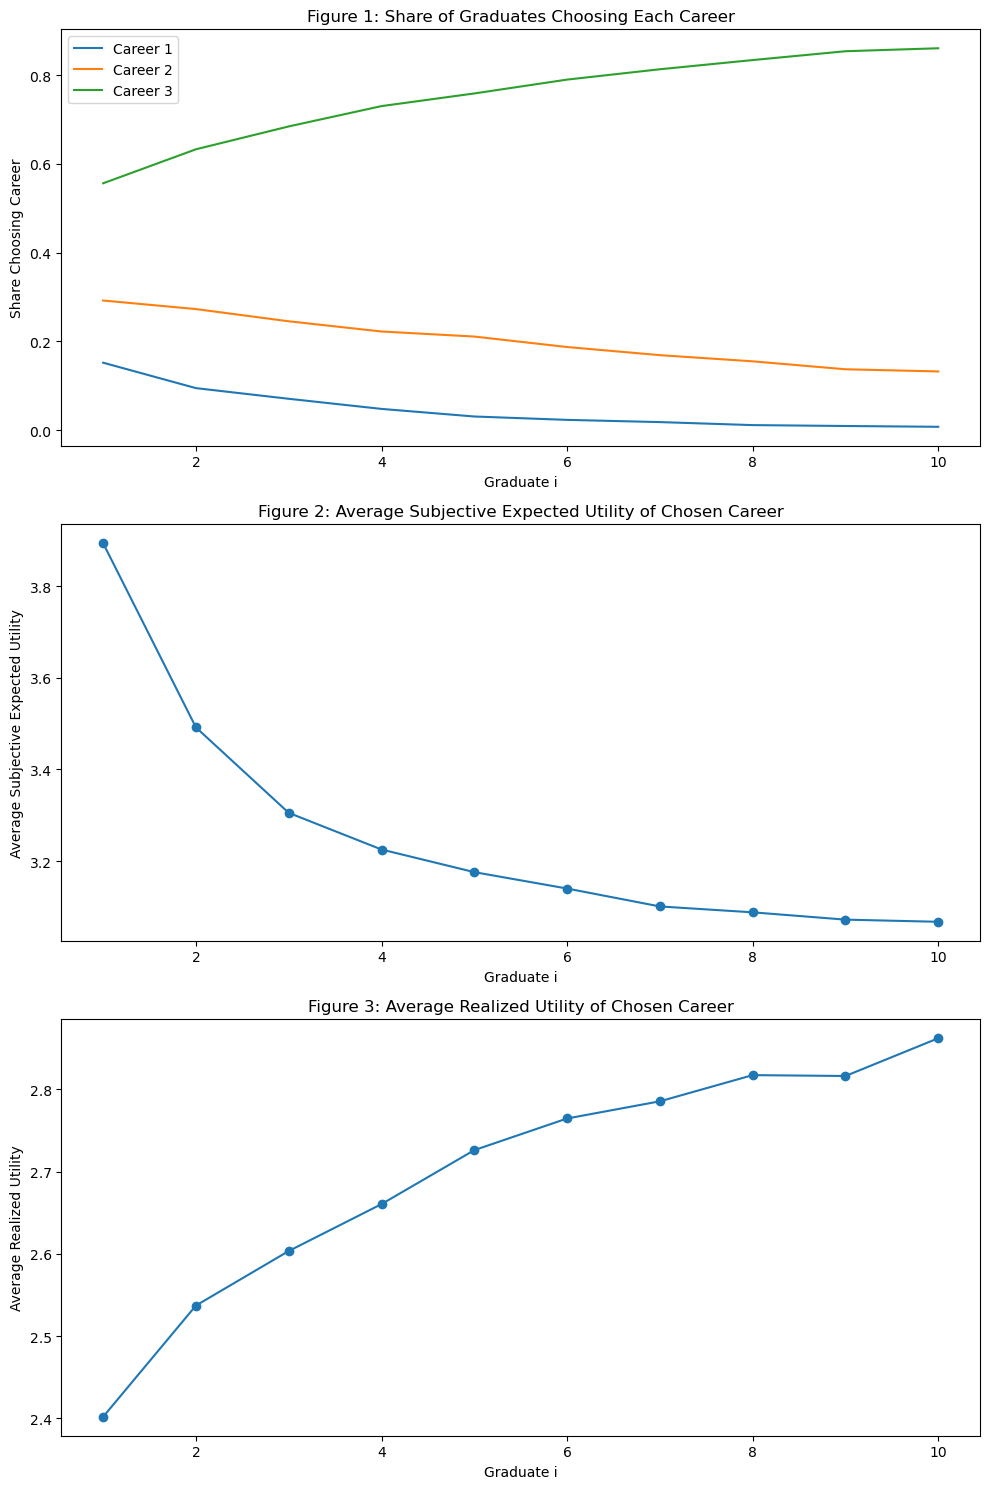

In [16]:
# Initialize storage for results
career_choices = np.zeros((par.N, par.K), dtype=int)
prior_expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulation
for k in range(par.K):
    for i in range(par.N):
        Fi = i + 1
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, Fi))
        prior_expectation = par.v[:, np.newaxis] + epsilon_friends
        prior_expected_utility = np.mean(prior_expectation, axis=1)

        epsilon_self = np.random.normal(0, par.sigma, par.J)
        realized_utility = par.v + epsilon_self

        best_career = np.argmax(prior_expected_utility)
        
        career_choices[i, k] = best_career
        prior_expected_utilities[i, k] = prior_expected_utility[best_career]
        realized_utilities[i, k] = realized_utility[best_career]

# Calculate shares, average subjective expected utility, and average realized utility
career_shares = np.zeros((par.N, par.J))
avg_prior_expected_utilities = np.zeros(par.N)
avg_realized_utilities = np.zeros(par.N)

for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(career_choices[i, :] == j)
    avg_prior_expected_utilities[i] = np.mean(prior_expected_utilities[i, :])
    avg_realized_utilities[i] = np.mean(realized_utilities[i, :])

# Plotting the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Share of graduates choosing each career
for j in range(par.J):
    axs[0].plot(range(1, par.N + 1), career_shares[:, j], label=f'Career {j+1}')
axs[0].set_xlabel('Graduate i')
axs[0].set_ylabel('Share Choosing Career')
axs[0].set_title('Figure 1: Share of Graduates Choosing Each Career')
axs[0].legend()

# Average subjective expected utility
axs[1].plot(range(1, par.N + 1), avg_prior_expected_utilities, marker='o')
axs[1].set_xlabel('Graduate i')
axs[1].set_ylabel('Average Subjective Expected Utility')
axs[1].set_title('Figure 2: Average Subjective Expected Utility of Chosen Career')

# Average realized utility
axs[2].plot(range(1, par.N + 1), avg_realized_utilities, marker='o')
axs[2].set_xlabel('Graduate i')
axs[2].set_ylabel('Average Realized Utility')
axs[2].set_title('Figure 3: Average Realized Utility of Chosen Career')

plt.tight_layout()
plt.show()


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [17]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [18]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [19]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [20]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [21]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [22]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [23]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [24]:
# write your answer here